<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/%E9%9D%9E%E8%B2%A0%E5%80%A4%E8%A1%8C%E5%88%97%E5%9B%A0%E5%AD%90%E5%88%86%E8%A7%A3%26%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%81%A8%E5%BE%AE%E8%AA%BF%E6%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF

In [ ]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
# reshapeする時の画像解像度に応じた行列
image_shape = people.images[0].shape

# 1人物50枚までにする為の処理。使用するindexにTrueを立てる、
# targetの数分のarrayを用意
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # 各ターゲットの50件までTrueを立てる whereで条件に合うpeopleのindexを取得できる
    mask[np.where(people.target == target)[0][:50]] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [ ]:
# Trueのデータのみ訓練、検証データに使用する
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

In [ ]:
# NMF分解の実行 15個の特徴量に分解
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


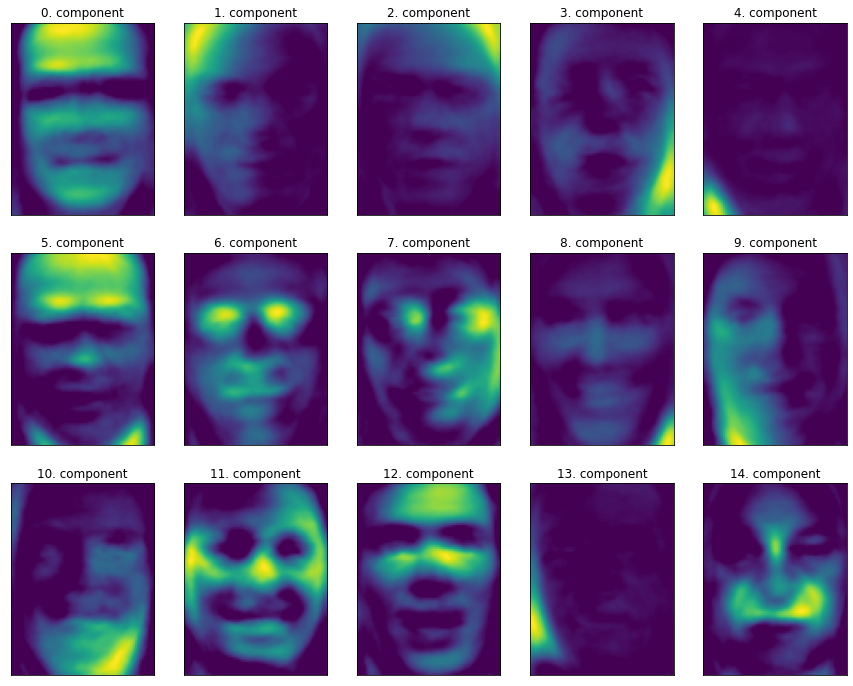

In [ ]:
fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

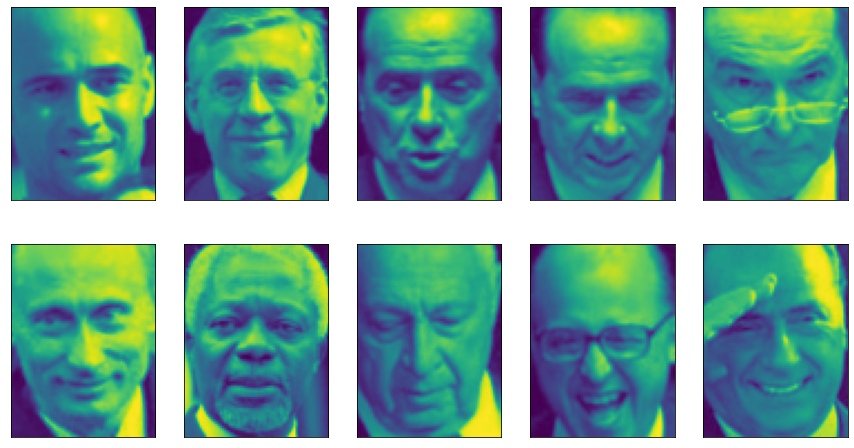

In [ ]:
compn = 5
# 3つ目の成分でソート、
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={"xticks":(), "yticks":()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=e3962f44fe9ce43b5898492eacfdda0b6783bfeb667be412e4a6dc5bdad5f374
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


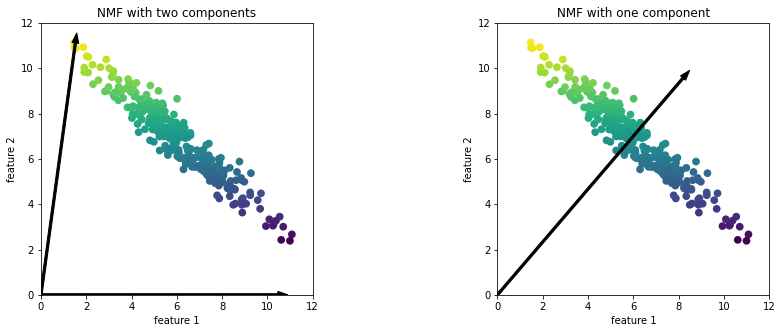

In [ ]:
import mglearn

mglearn.plots.plot_nmf_illustration()

(2000, 3)


Text(0, 0.5, 'Signal')

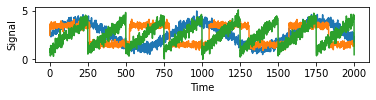

In [ ]:
# 元となる発信源 3つの発信源
S = mglearn.datasets.make_signals()
print(S.shape)
plt.figure(figsize=(6,1))
plt.plot(S,"-")
plt.xlabel("Time")
plt.ylabel("Signal")

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


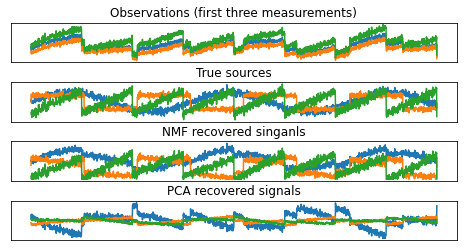

In [ ]:
# データを混ぜ合わせて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

# 比較の為、PCAでも次元削減
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ["Observations (first three measurements)", "True sources", "NMF recovered singanls", "PCA recovered signals" ]

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={"hspace":.5}, subplot_kw={"xticks":(), "yticks":()})
for model, name, ax in zip (models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],"-")

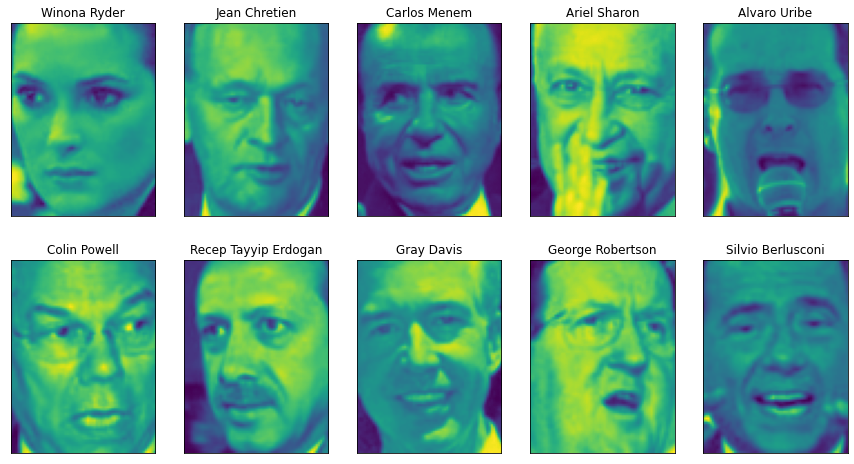

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
# reshapeする時の画像解像度に応じた行列
image_shape = people.images[0].shape

fix, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={"xticks":(), "yticks":()})
for target, image, ax in zip(people.target,people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
print("people.image.shape:{}".format(people.images.shape))
print("number of class:{}".format(len(people.target_names)))

people.image.shape:(3023, 87, 65)
number of class:62


In [ ]:
counts=np.bincount(people.target)
for i,(count,name) in enumerate(zip(counts,people.target_names)):
  print("{0:25}{1:3}".format(name,count,end=''))
  if (i+1)%3==0:
    print()

Alejandro Toledo          39
Alvaro Uribe              35
Amelie Mauresmo           21

Andre Agassi              36
Angelina Jolie            20
Ariel Sharon              77

Arnold Schwarzenegger     42
Atal Bihari Vajpayee      24
Bill Clinton              29

Carlos Menem              21
Colin Powell             236
David Beckham             31

Donald Rumsfeld          121
George Robertson          22
George W Bush            530

Gerhard Schroeder        109
Gloria Macapagal Arroyo   44
Gray Davis                26

Guillermo Coria           30
Hamid Karzai              22
Hans Blix                 39

Hugo Chavez               71
Igor Ivanov               20
Jack Straw                28

Jacques Chirac            52
Jean Chretien             55
Jennifer Aniston          21

Jennifer Capriati         42
Jennifer Lopez            21
Jeremy Greenstock         24

Jiang Zemin               20
John Ashcroft             53
John Negroponte           31

Jose Maria Aznar          23
Jua

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # 各ターゲットの50件までTrueを立てる whereで条件に合うpeopleのindexを取得できる
    mask[np.where(people.target == target)[0][:50]] = 1
# Trueのデータのみ訓練、検証データに使用する
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

In [ ]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca_shape:{}",format(X_train_pca.shape))
print("pca.components:{}",format(pca.components_.shape))

X_train_pca_shape:{} (1547, 100)
pca.components:{} (100, 5655)


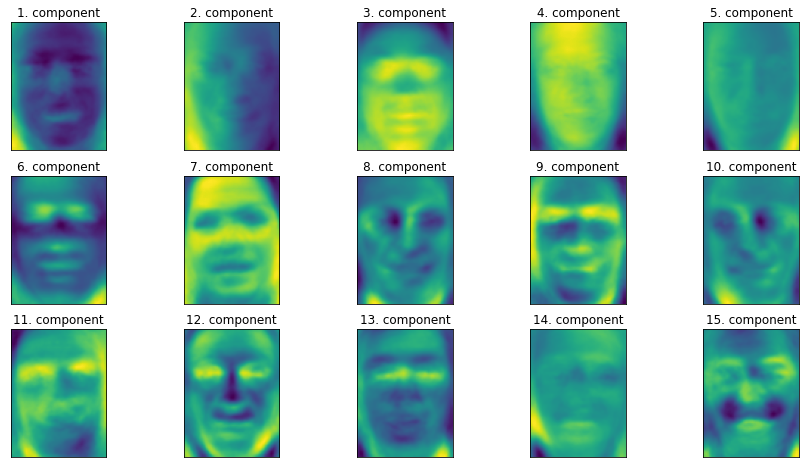

In [ ]:
fix, axes = plt.subplots(3,5,figsize=(15,8), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap="viridis")
    ax.set_title("{}. component".format(i+1))

In [ ]:
nmf = NMF(n_components=100,random_state=0).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

print("X_train_pca_shape:{}",format(X_train_nmf.shape))
print("pca.components:{}",format(nmf.components_.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


X_train_pca_shape:{} (1547, 100)
pca.components:{} (100, 5655)


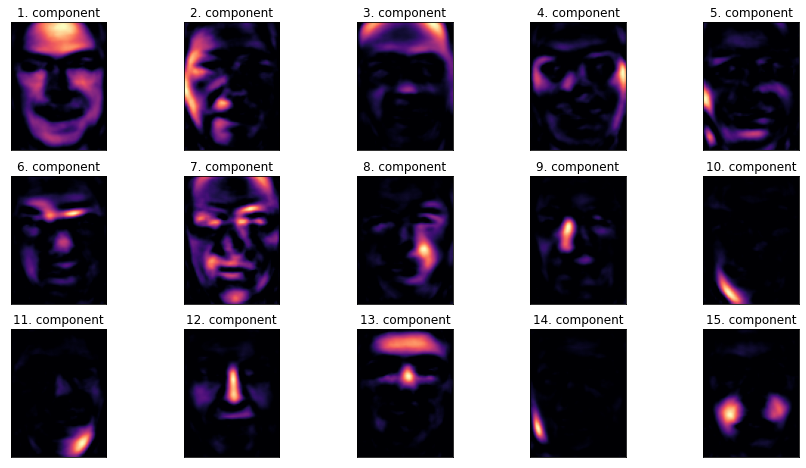

In [ ]:
fix, axes = plt.subplots(3,5,figsize=(15,8), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap="magma")
    ax.set_title("{}. component".format(i+1))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


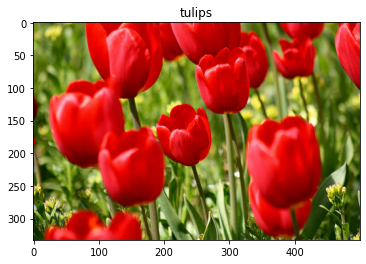

In [ ]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

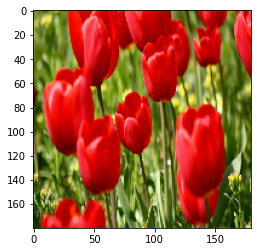

In [ ]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
# Add the image to a batch.
image = tf.expand_dims(image, 0)

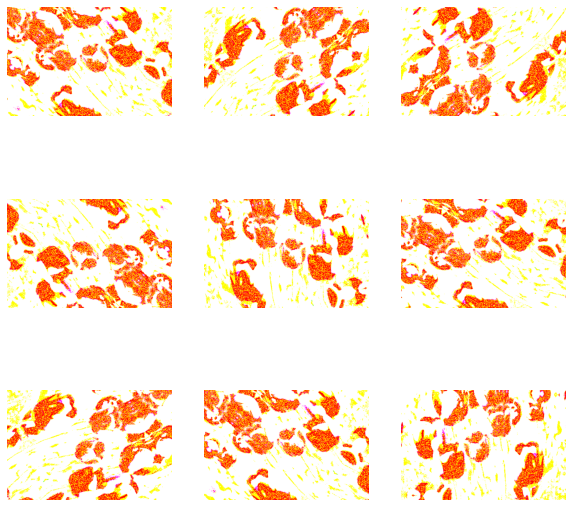

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 137s 1s/step - loss: 1.3349 - accuracy: 0.4166 - val_loss: 1.1954 - val_accuracy: 0.5177
Epoch 2/5
92/92 [==============================] - 126s 1s/step - loss: 1.0960 - accuracy: 0.5497 - val_loss: 1.0356 - val_accuracy: 0.5995
Epoch 3/5
92/92 [==============================] - 135s 1s/step - loss: 0.9742 - accuracy: 0.6083 - val_loss: 0.9731 - val_accuracy: 0.6185
Epoch 4/5
92/92 [==============================] - 105s 1s/step - loss: 0.9141 - accuracy: 0.6420 - val_loss: 0.9246 - val_accuracy: 0.6403
Epoch 5/5
92/92 [==============================] - 105s 1s/step - loss: 0.8684 - accuracy: 0.6614 - val_loss: 0.9047 - val_accuracy: 0.6431


In [ ]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 4s 312ms/step - loss: 0.8788 - accuracy: 0.6458
Accuracy 0.6457765698432922


In [ ]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [ ]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

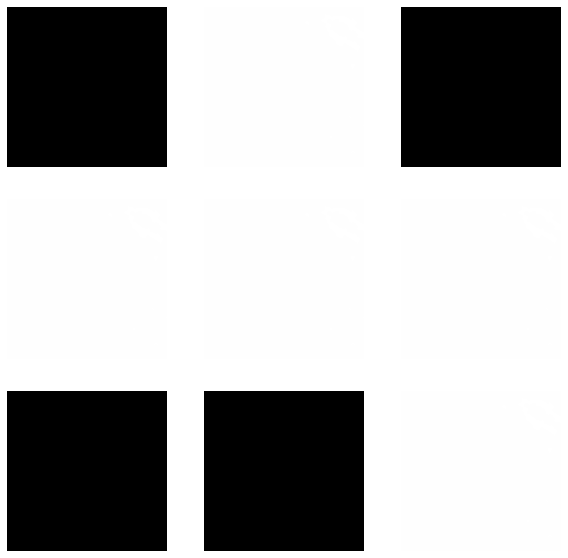

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteG6MWFG/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteG6MWFG/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteG6MWFG/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


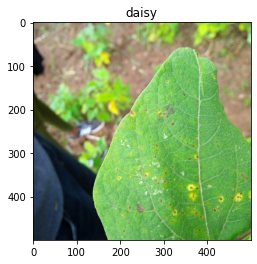

In [ ]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

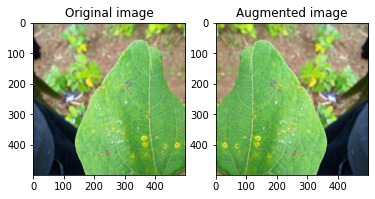

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

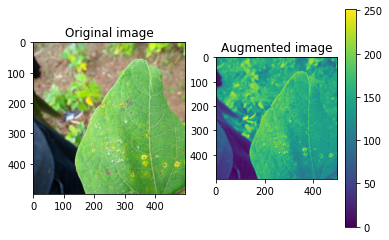

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

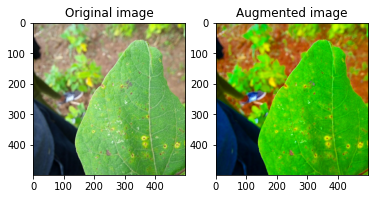

In [ ]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

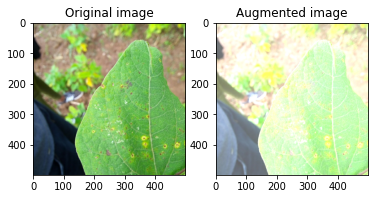

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

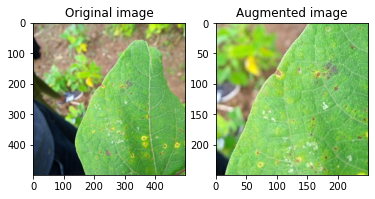

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

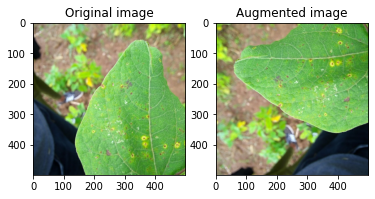

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

In [ ]:
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [ ]:
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

In [ ]:
# Create a `Counter` object and `Dataset.zip` it together with the training set.
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

In [ ]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

In [ ]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

In [ ]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)